In [34]:
import numpy as np
import pandas as pd
df_spotify = pd.read_csv("spotify-2023.csv", index_col="track_name", encoding='latin1')
df_spotify = df_spotify.drop(['artist(s)_name', 'artist_count', 'streams', 'in_apple_charts', 'bpm', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists','key', 'mode', 'in_deezer_playlists', 'valence_%', 'in_deezer_charts', 'in_shazam_charts', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], axis=1)
df_spotify.head(3)

,released_year,danceability_%,energy_%
track_name,,,
Seven (feat. Latto) (Explicit Ver.),2023,80,83
LALA,2023,71,74
vampire,2023,51,53


Text(0.5, 1.0, 'Danceability vs Energy of Songs')

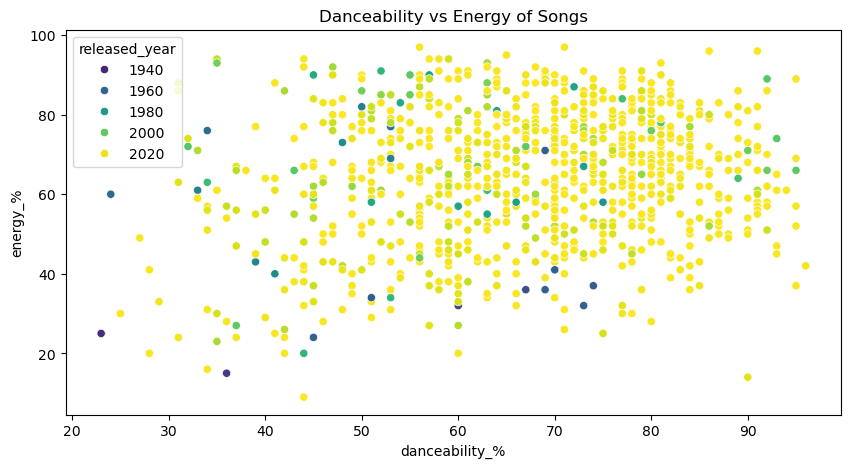

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(10, 5))

sns.scatterplot(
    data=df_spotify,
    x="danceability_%",     # X-axis: How danceable the song is
    y="energy_%",            # Y-axis: Energy level of the song
    hue="released_year",     # Color by the release year of the song
    palette="viridis"        # A sequential color palette suited for years
)

plt.title("Danceability vs Energy of Songs")


In [36]:
from sklearn import preprocessing
X = df_spotify.drop(["released_year"], axis=1)
X_norm = preprocessing.normalize(X)
Xarr = X.to_numpy()

In [37]:
# Group assignment using maxnorm
def group_assignment_maxnorm(data, centroids):
    grouping_vec_c = np.zeros(len(data))
    for i in range(len(data)):
        dist = np.zeros(len(centroids))
        for j in range(len(centroids)):
            dist[j] = np.max(np.abs(data[i] - centroids[j]))  # Max norm
        min_dist = min(dist)
        for j in range(len(centroids)):
            if min_dist == dist[j]:
                grouping_vec_c[i] = j + 1
    return grouping_vec_c

# Clustering objective using maxnorm
def clustering_objective_maxnorm(data, grouping, centroids):
    J_obj = 0
    for i in range(len(data)):
        for j in range(len(centroids)):
            if grouping[i] == (j + 1):
                J_obj += np.max(np.abs(data[i] - centroids[j]))  # Max norm
    J_obj = J_obj / len(data)
    return J_obj

#Update representatives/centroids
def update_centroid(data, grouping, centroids):
    new_centroids = [];
    for i in range(len(centroids)):
        cent = np.zeros(len(data[0]))
        count = 0
        for j in range(len(data)):
            if grouping[j] == (i+1):
                cent = cent+data[j]
                count += 1
        group_average = cent/count
        new_centroids.append(group_average)
    return new_centroids
    
# Kmeans using maxnorm
def Kmeans_maxnorm(data, centroids):
    iteration = 0
    J_obj_vector = []
    Stop = False
    while not Stop:
        grouping = group_assignment_maxnorm(data, centroids)
        new_centroids = update_centroid(data, grouping, centroids)
        J_obj = clustering_objective_maxnorm(data, grouping, new_centroids)
        J_obj_vector.append(J_obj)
        iteration += 1
        if np.linalg.norm(np.array(new_centroids) - np.array(centroids)) < 1e-6:
            Stop = True
        else:
            centroids = new_centroids
    return new_centroids, grouping, J_obj_vector, iteration

In [38]:
#creating a new dataset by dropping everything except in_apple_charts and energy_%
df_spotify1 = pd.read_csv("spotify-2023.csv", index_col="track_name", encoding='latin1')
df_spotify1 = df_spotify1.drop(['artist(s)_name', 'artist_count','danceability_%', 'streams', 'bpm', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists','key', 'mode', 'in_deezer_playlists', 'valence_%', 'in_deezer_charts', 'in_shazam_charts', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], axis=1)
df_spotify1.head(3)

,released_year,in_apple_charts,energy_%
track_name,,,
Seven (feat. Latto) (Explicit Ver.),2023,263,83
LALA,2023,126,74
vampire,2023,207,53


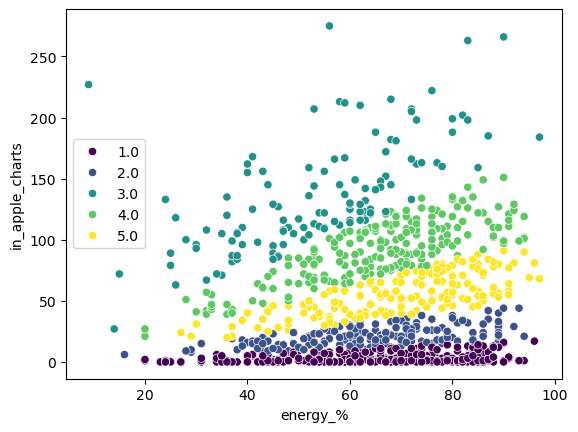

In [39]:
X1 = df_spotify1.drop(["released_year"], axis=1)
X_norm1 = preprocessing.normalize(X1)
Xarr1 = X1.to_numpy()

index1 = np.random.randint(200, size=5)
reps1= np.array([X_norm1[index1[0]], X_norm1[index1[1]], X_norm1[index1[2]], X_norm1[index1[3]], X_norm1[index1[4]]])
labels1 = Kmeans_maxnorm(X_norm1, reps1)[1]

sns.scatterplot(data=df_spotify1, x='energy_%', y='in_apple_charts', hue=labels1, palette="viridis")
plt.show()

In [40]:
#creating a new dataset by dropping everything except streams and energy_%
df_spotify2 = pd.read_csv("spotify-2023.csv", index_col="track_name", encoding='latin1')
df_spotify2 = df_spotify2.drop(['artist(s)_name', 'artist_count','danceability_%', 'in_apple_charts', 'bpm', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists','key', 'mode', 'in_deezer_playlists', 'valence_%', 'in_deezer_charts', 'in_shazam_charts', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], axis=1)
df_spotify2.head(3)

,released_year,streams,energy_%
track_name,,,
Seven (feat. Latto) (Explicit Ver.),2023,141381703,83
LALA,2023,133716286,74
vampire,2023,140003974,53


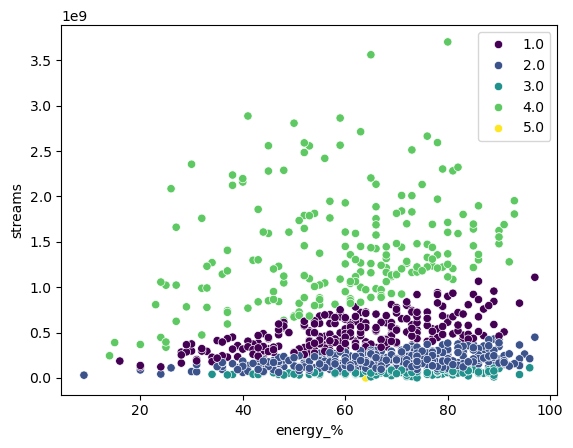

In [41]:
X2 = df_spotify2.drop(["released_year"], axis=1)
X_norm2 = preprocessing.normalize(X2)
Xarr2 = X2.to_numpy()

index2 = np.random.randint(200, size=5)
reps2= np.array([X_norm2[index2[0]], X_norm2[index2[1]], X_norm2[index2[2]], X_norm2[index2[3]], X_norm2[index2[4]]])
labels2 = Kmeans_maxnorm(X_norm2, reps2)[1]

sns.scatterplot(data=df_spotify2, x='energy_%', y='streams', hue=labels2, palette="viridis")
plt.show()

In [42]:
#creating a new dataset by dropping everything except in_spotify_charts and energy_%

df_spotify3 = pd.read_csv("spotify-2023.csv", index_col="track_name", encoding='latin1')
df_spotify3 = df_spotify3.drop(['artist(s)_name', 'artist_count','danceability_%', 'in_apple_charts', 'bpm', 'released_month', 'released_day', 'in_spotify_playlists', 'streams', 'in_apple_playlists','key', 'mode', 'in_deezer_playlists', 'valence_%', 'in_deezer_charts', 'in_shazam_charts', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], axis=1)
df_spotify3.head(3)

,released_year,in_spotify_charts,energy_%
track_name,,,
Seven (feat. Latto) (Explicit Ver.),2023,147,83
LALA,2023,48,74
vampire,2023,113,53


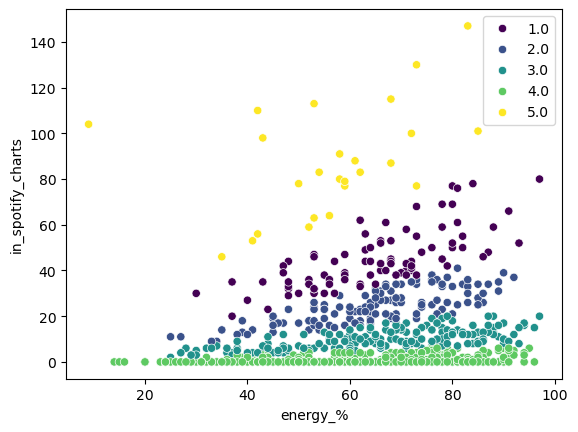

In [43]:
X3 = df_spotify3.drop(["released_year"], axis=1)
X_norm3 = preprocessing.normalize(X3)
Xarr3 = X3.to_numpy()

index3 = np.random.randint(200, size=5)
reps3= np.array([X_norm3[index3[0]], X_norm3[index3[1]], X_norm3[index3[2]], X_norm3[index3[3]], X_norm3[index3[4]]])
labels3 = Kmeans_maxnorm(X_norm3, reps3)[1]

sns.scatterplot(data=df_spotify3, x='energy_%', y='in_spotify_charts', hue=labels3, palette="viridis")
plt.show()

In [44]:
#creating a new dataset by dropping everything except danceability_% and energy_%

df_spotify4 = pd.read_csv("spotify-2023.csv", index_col="track_name", encoding='latin1')
df_spotify4 = df_spotify4.drop(['artist(s)_name', 'artist_count','in_spotify_charts', 'in_apple_charts', 'bpm', 'released_month', 'released_day', 'in_spotify_playlists', 'streams', 'in_apple_playlists','key', 'mode', 'in_deezer_playlists', 'valence_%', 'in_deezer_charts', 'in_shazam_charts', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], axis=1)
df_spotify4.head(3)

,released_year,danceability_%,energy_%
track_name,,,
Seven (feat. Latto) (Explicit Ver.),2023,80,83
LALA,2023,71,74
vampire,2023,51,53


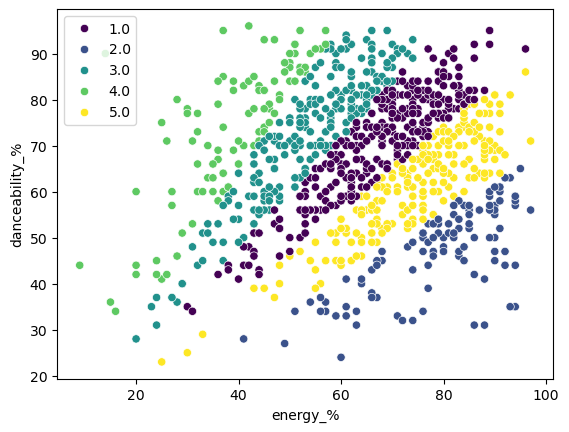

In [45]:
X4 = df_spotify4.drop(["released_year"], axis=1)
X_norm4 = preprocessing.normalize(X4)
Xarr4 = X4.to_numpy()

index4 = np.random.randint(200, size=5)
reps4= np.array([X_norm4[index4[0]], X_norm4[index4[1]], X_norm4[index4[2]], X_norm4[index4[3]], X_norm4[index4[4]]])
labels4 = Kmeans_maxnorm(X_norm4, reps4)[1]

sns.scatterplot(data=df_spotify4, x='energy_%', y='danceability_%', hue=labels4, palette="viridis")
plt.show()

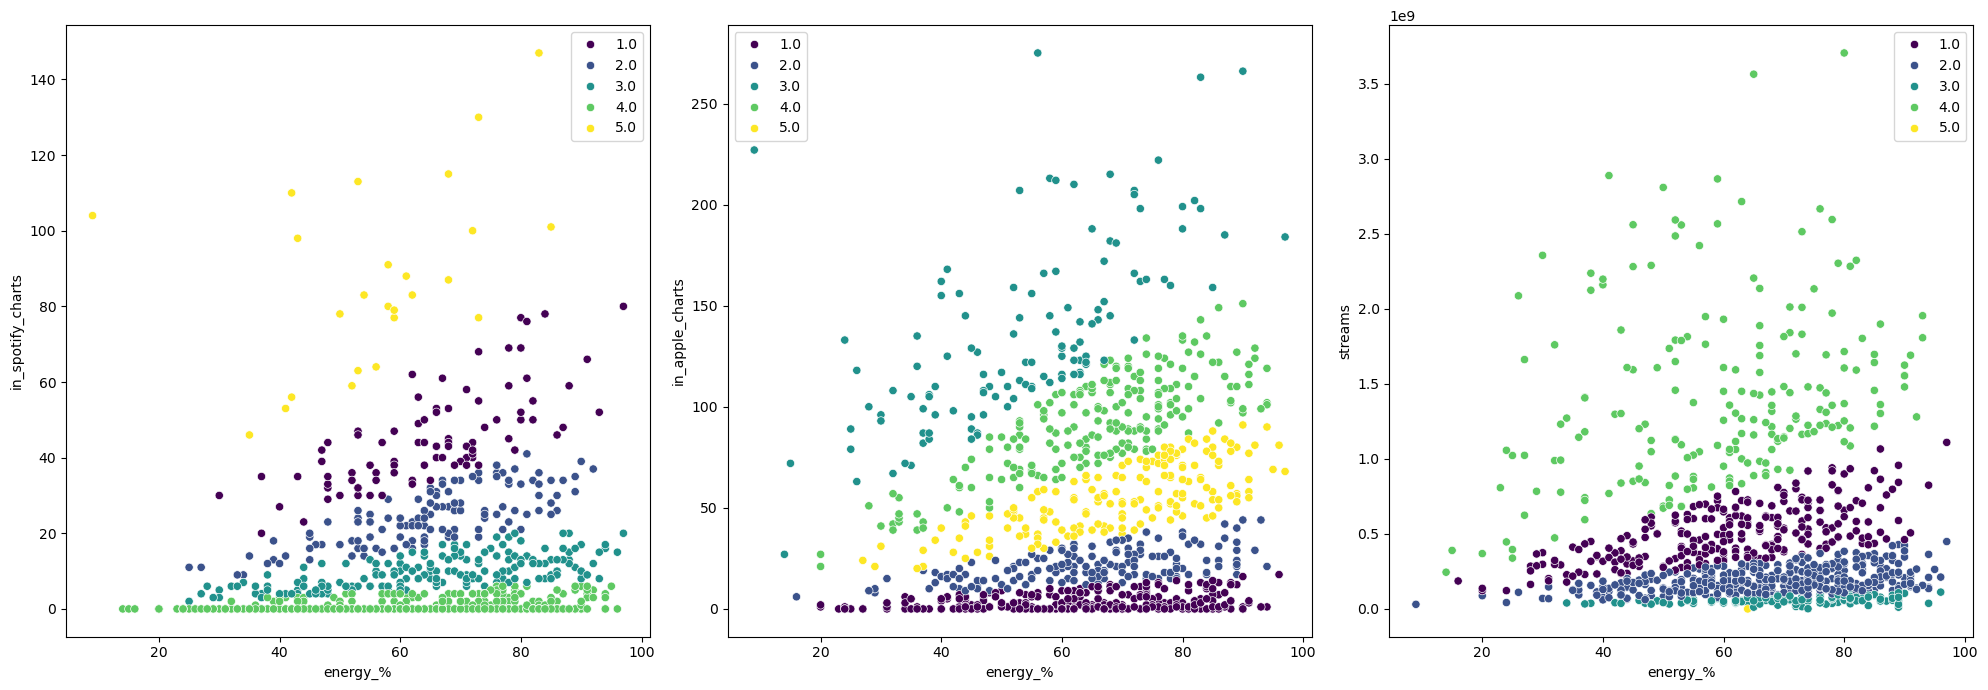

In [46]:
# Create subplots with 2 rows and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Plot each scatter plot in the correct position
sns.scatterplot(data=df_spotify3, x='energy_%', y='in_spotify_charts', hue=labels3, palette="viridis", ax=axs[0])
sns.scatterplot(data=df_spotify1, x='energy_%', y='in_apple_charts', hue=labels1, palette="viridis", ax=axs[1])
sns.scatterplot(data=df_spotify2, x='energy_%', y='streams', hue=labels2, palette="viridis", ax=axs[2])


# Adjust layout
plt.tight_layout()
plt.show()


In [47]:
#creating a new dataset by dropping everything except valence_% and energy_%

df_spotify5 = pd.read_csv("spotify-2023.csv", index_col="track_name", encoding='latin1')
df_spotify5 = df_spotify5.drop(['artist(s)_name', 'artist_count','in_spotify_charts', 'in_apple_charts', 'bpm', 'released_month', 'released_day', 'in_spotify_playlists', 'streams', 'in_apple_playlists','key', 'mode', 'in_deezer_playlists', 'instrumentalness_%', 'in_deezer_charts', 'in_shazam_charts', 'acousticness_%', 'danceability_%', 'liveness_%', 'speechiness_%'], axis=1)
df_spotify5.head(3)


,released_year,valence_%,energy_%
track_name,,,
Seven (feat. Latto) (Explicit Ver.),2023,89,83
LALA,2023,61,74
vampire,2023,32,53


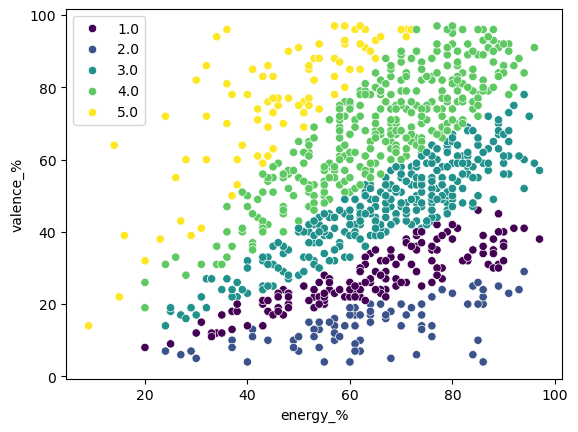

In [48]:
X5= df_spotify5.drop(["released_year"], axis=1)
X_norm5 = preprocessing.normalize(X5)
Xarr5 = X5.to_numpy()

index5= np.random.randint(200, size=5)
reps5= np.array([X_norm5[index5[0]], X_norm5[index5[1]], X_norm5[index5[2]], X_norm5[index5[3]], X_norm5[index5[4]]])
labels5 = Kmeans_maxnorm(X_norm5, reps5)[1]

sns.scatterplot(data=df_spotify5, x='energy_%', y='valence_%', hue=labels5, palette="viridis")
plt.show()

In [49]:
#creating a new dataset by dropping everything except bpm and energy_%

df_spotify6 = pd.read_csv("spotify-2023.csv", index_col="track_name", encoding='latin1')
df_spotify6 = df_spotify6.drop(['artist(s)_name', 'artist_count','in_spotify_charts', 'in_apple_charts', 'instrumentalness_%', 'released_month', 'released_day', 'in_spotify_playlists', 'streams', 'in_apple_playlists','key', 'mode', 'in_deezer_playlists', 'valence_%', 'in_deezer_charts', 'in_shazam_charts', 'acousticness_%', 'danceability_%', 'liveness_%', 'speechiness_%'], axis=1)
df_spotify6.head(3)


,released_year,bpm,energy_%
track_name,,,
Seven (feat. Latto) (Explicit Ver.),2023,125,83
LALA,2023,92,74
vampire,2023,138,53


C:\Users\nisha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\nisha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\nisha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\nisha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

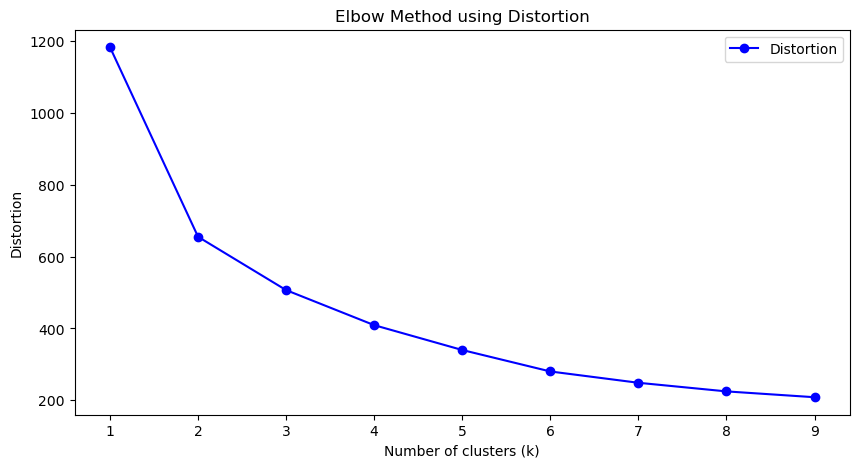

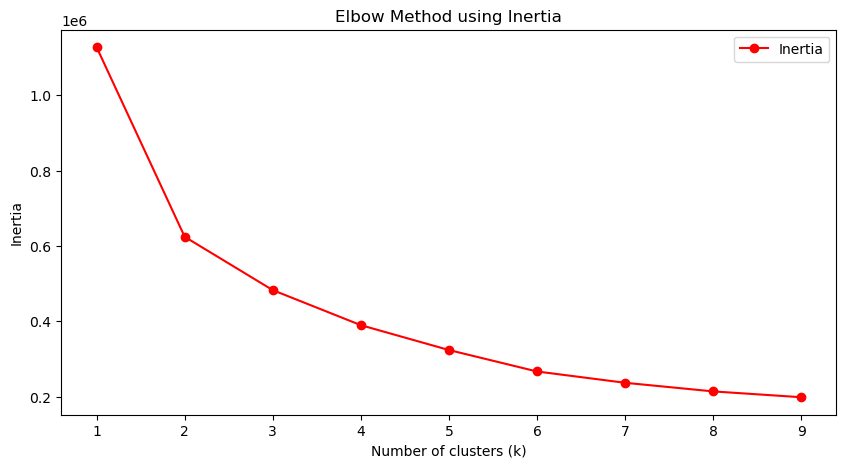

In [50]:
#elbow method using inertia -- adapted from GeeksForGeeks (properly cited in my report)
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Initialize lists to store distortion and inertia values
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

# Fit K-Means for different values of k
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42, n_init=10).fit(df_spotify6)

    # Calculate distortion (Average squared distance from points to their closest cluster center)
    distortions.append(sum(np.min(cdist(df_spotify6, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) /df_spotify6.shape[0])
    
    # Inertia (Sum of squared distances to nearest cluster center)
    inertias.append(kmeanModel.inertia_)
    
    # Store the mappings
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K, distortions, 'bo-', label='Distortion')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method using Distortion')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(K, inertias, 'ro-', label='Inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method using Inertia')
plt.legend()
plt.show()


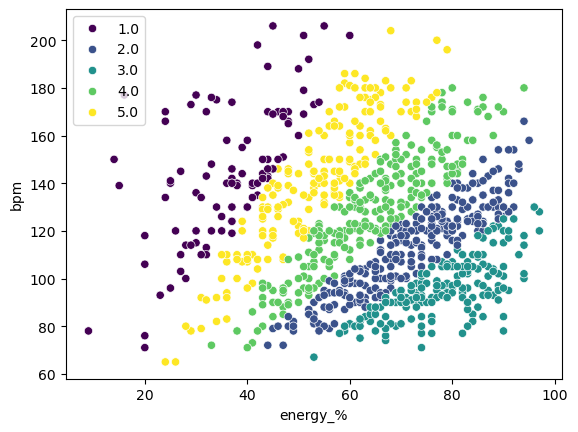

In [51]:
X6= df_spotify6.drop(["released_year"], axis=1)
X_norm6 = preprocessing.normalize(X6)
Xarr6 = X6.to_numpy()

index6= np.random.randint(200, size=5)
reps6= np.array([X_norm6[index6[0]], X_norm6[index6[1]], X_norm6[index6[2]], X_norm6[index6[3]], X_norm6[index6[4]]])
labels6 = Kmeans_maxnorm(X_norm6, reps6)[1]

sns.scatterplot(data=df_spotify6, x='energy_%', y='bpm', hue=labels6, palette="viridis")
plt.show()

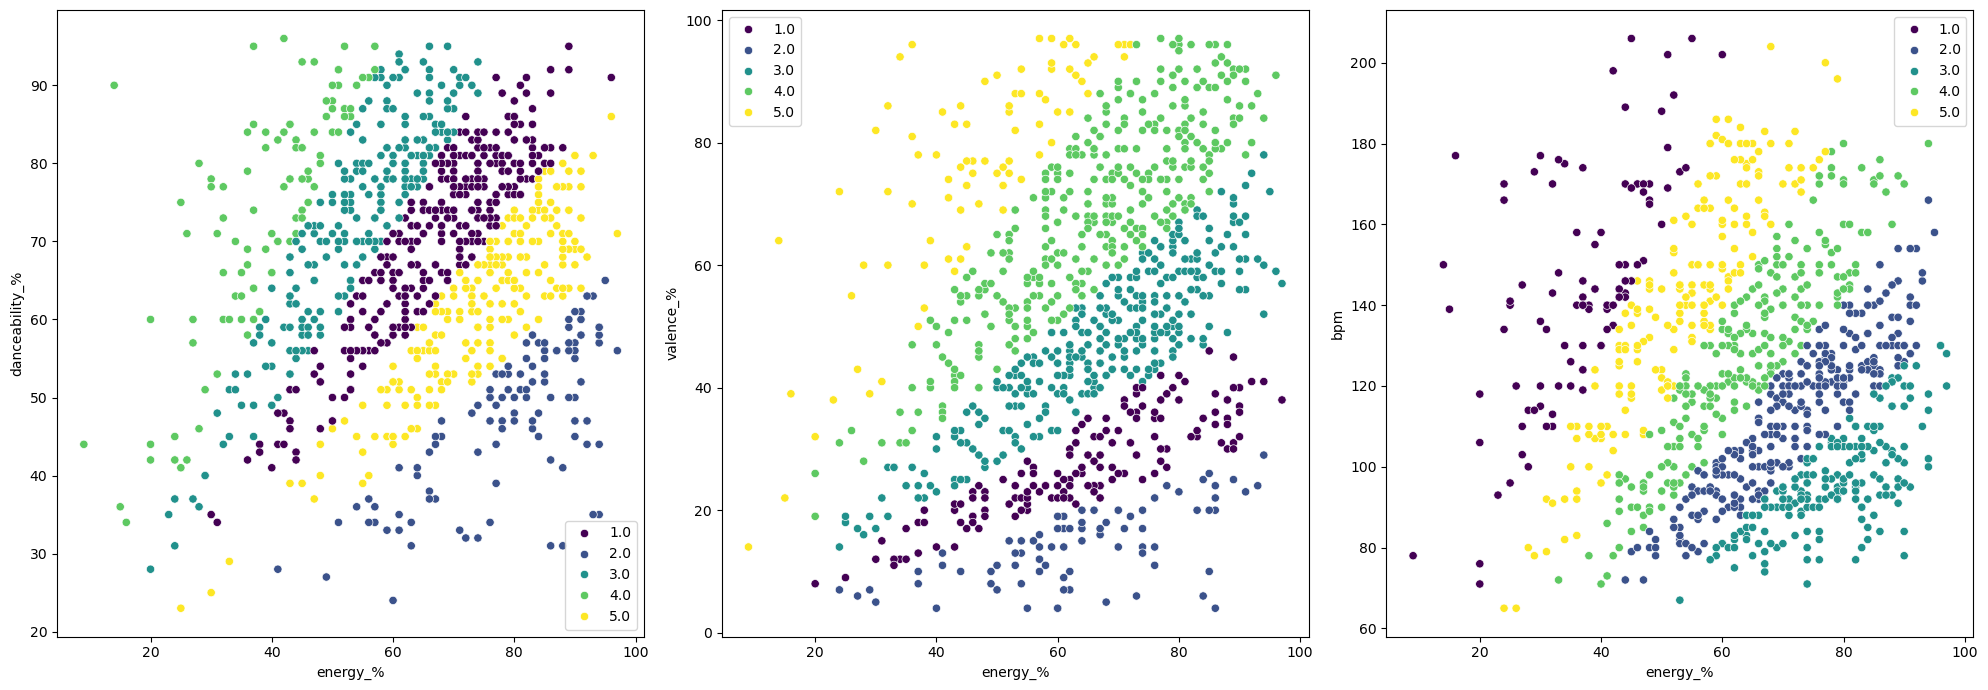

In [52]:
# Create subplots with 2 rows and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Plot each scatter plot in the correct position
sns.scatterplot(data=df_spotify4, x='energy_%', y='danceability_%', hue=labels4, palette="viridis", ax=axs[0])
sns.scatterplot(data=df_spotify5, x='energy_%', y='valence_%', hue=labels5, palette="viridis", ax=axs[1])
sns.scatterplot(data=df_spotify6, x='energy_%', y='bpm', hue=labels6, palette="viridis", ax=axs[2])


# Adjust layout
plt.tight_layout()
plt.show()
